# nb_opma0_rayleigh

In [1]:
%matplotlib inline
import sys
sys.path.append('./opmap/opmap/')

In [2]:
from RawCam import RawCam
from VmemMap import VmemMap
from PhaseMap import PhaseMap
from PhaseVarianceMap import PhaseVarianceMap

In [3]:
import copy
import pandas as pd
import os
import numpy as np

## Parameters

In [4]:
# ! find /mnt/recordings/ExperimentData/ -type d -maxdepth 2
# ! ls /mnt/nas

In [5]:
srcdir = "/mnt/recordings/ExperimentData/"
outdir = "/mnt/nas/nb_opmap_rayleigh"

if not os.path.exists(outdir) : os.makedirs(outdir)

_param = {
    'path' : None,
    'threshold' : None,
    'size' : None,
    'cam_type' : "sa4",
    'image_width' : 512,
    'image_height' : 512,
    'frame_start' : 0,
    'frame_end' : 1000
}

sessions = [
#     "2004-08-06/C001S0004",
    "20080902-3/C001S0025"
    
]

sizes = [3,9,15,21]

thresholds = np.arange(0.4, 1.0, 0.1)


In [6]:
params = []
for sess in sessions:
    for s in sizes:
        for threshold in thresholds:
            param = copy.copy(_param)
            param["path"] = os.path.join(srcdir, sess)
            param["size"] = s
            param["threshold"] = threshold
            params.append(param)
    
dict_param = {}
for key in _param.keys():
    dict_param[key] = [param[key] for param in params ]
    
dict_param
df = pd.DataFrame(dict_param)
df

,cam_type,frame_end,frame_start,image_height,image_width,path,size,threshold
0,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.4
1,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.5
2,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.6
3,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.7
4,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.8
5,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,3,0.9
6,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,9,0.4
7,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,9,0.5
8,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,9,0.6
9,sa4,1000,0,512,512,/mnt/recordings/ExperimentData/20080902-3/C001...,9,0.7


In [7]:
param = params[0]

In [8]:
## RawCam

param_opmap = copy.copy(_param)
del(param_opmap["threshold"])
del(param_opmap["size"])
param_opmap['path'] = param['path']

cam = RawCam(**param_opmap)

# cam.showFrame(showFrame)

## VmemMap

vmem = VmemMap(cam)
vmem.setDiffRange(diff_min=20)

vmem.smooth(1+int(param['image_width']/256)*4)

# vmem_.showFrame(230)

# vmem.showFrame(showFrame)
# vmem.showROI()

In [9]:
## PhaseMap

# pmap = PhaseMap(vmem, shrink=int(param['image_width']/128), sigma_mean=32, sigma_t = 5)
pmap = PhaseMap(vmem)

./opmap/opmap/VideoData.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data = np.zeros((length, height, width), dtype=np.float32)
/root/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


In [10]:
# pmap = PhaseMap(vmem, shrink=1)
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)

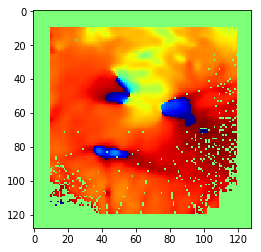

In [11]:
showFrame=550

pmap.showFrame(showFrame)
# pmap.showROI()

In [12]:
## PhaseVarianceMap

pvmap = PhaseVarianceMap(pmap, size=param['size'])
pvmap.morphROI(erosion=param['size'])

# pvmap.showFrame(showFrame)
# pvmap.showROI()

In [13]:
# vmem.saveMovie(os.path.join(outdir, 'vmem.avi'),skip=5)
# dstdir = os.path.join(outdir, param['session'])
pmap.saveMovie(os.path.join(outdir, 'pmap.avi'))
pvmap.saveMovie(os.path.join(outdir, 'pvmap.avi'))

ffmpeg -r 15 -y -i "./temp_mov/%06d.png" -vcodec rawvideo "./temp_mov.avi"
ffmpeg -r 15 -y -i "./temp_mov/%06d.png" -vcodec rawvideo "./temp_mov.avi"
